ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [3]:
print(data['Time_taken(min)'])

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
45588    (min) 32
45589    (min) 36
45590    (min) 16
45591    (min) 26
45592    (min) 36
Name: Time_taken(min), Length: 45593, dtype: object


# Wrangle, prepare, clean the data

### Understanding data Infrmation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [5]:
data.shape

(45593, 20)

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weatherconditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken(min)'],
      dtype='object')

# Data-dictionary

|Column|Description |
| :------------ |:---------------:|
|**id**|order ID number| 
|**delivery_person_id**|ID number of the delivery partner|
|**delivery_person_age**|Age of the delivery partner|
|**delivery_person_ratings**|Ratings of the delivery partner based on past deliveries|
|**restaurant_latitude**|The latitude of the restaurant|
|**restaurant_longitude**|The longitude of the restaurant|
|**delivery_location_latitude**|The latitude of the delivery location|
|**delivery_location_longitude**|The longitude of the delivery location|
|**order_date**|Date of the order|
|**time_orderd**|Time the order was placed|
|**time_order_picked**|Time the order was picked|
|**weatherconditions**|Weather conditions of the day|
|**road_traffic_density**|Density of the traffic|
|**vehicle_condition**|Condition of the vehicle|
|**type_of_order**|The type of meal ordered by the customer|
|**type_of_vehicle**|The type of vehicle delivery partner rides|
|**multiple_deliveries**|Amount of deliveries driver picked|
|**festival**|If there was a Festival or no.|
|**city**|Type of city|
|**time_taken(min)**| The time taken by the delivery partner to complete the order|

### Understanding data structure 

Understanding the data structure is an essential aspect of data science projects as it plays a crucial role,because data have been organized, stored and manipulated for eficiency. 

Using the data they way it was thought to be use helps to reduce complexity, improve data quality, and enable faster and more accurate analysis.

In [7]:
data.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


From the data structure I can see that there is some variables can be group together such as Order_Date and Time_Orderd, then engineered using time format. The target (Time_taken(min)) also need to be transform in a descrete variable.

### Data Cleaning

Data cleaning, also known as data cleaning or data scrubbing, is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. The goal of data cleansing is to improve the quality of data so that it can be used effectively in data analysis, decision-making, and other applications.

Fortunately the data is already very clean, but there are some columns that need a touch, so for this section my focus will be:

- Map all the missing values.
- Transform target (Time_tajen(min)) into an int.
- Combine time fetures and transfrm it to datetime then engineer new features out of it.
- Change Dtypes
- Remove 'condition' from Weatherconditions
- Remove spaces from str features
- Identify and possibly remove or adjest outliers.

### Mapping missing value

### Transform target feature

In [8]:
# Ensure the column is of string type
data['time_taken(min)'] = data['time_taken(min)'].astype(str)

In [9]:
# Remove the "(min)" text and convert the result to a float
data['time_taken(min)'] = data['time_taken(min)'].str.extract('(\d+)').astype(int)

In [10]:
for column in data.columns:
    data[column] = data[column].apply(lambda value: np.nan if value =='NaN ' else value)

# Completing the data


Imputing missing values is important because missing data can cause problems in analysis and modeling. Missing data can lead to wrong results and make some tests invalid. In machine learning, missing data can cause models to perform poorly. Imputation helps by filling in the gaps with estimated values, keeping the data accurate and improving model performance. However, it's important to choose the right method and check how it affects the results.

### Missing Values

In data science, sometimes we have missing data, which can cause problems when we try to analyze it. Understanding why data is missing can help us decide what to do about it. 

There are three main types of missing data: 

- Missing Completely At Random (MCAR), 
- Missing At Random (MAR), and 
- Missing Not At Random (MNAR).




1. **Missing Completely At Random (MCAR)**


What it means: Data is missing completely at random if it happens by chance and has nothing to do with any other data. The missing data is just like a random mistake.

Example:
Imagine you are doing a survey, and someone accidentally skips a question. This has nothing to do with their age, gender, or anything else—it’s just random.

Effect: If data is MCAR, it’s easier to deal with. You can usually ignore the missing data without worrying that it will mess up your analysis.





2. **Missing At Random (MAR)**
What it means: Data is missing at random if the reason for it being missing is related to other data you have, but not to the missing data itself.

Example:
Let’s say people with higher incomes are less likely to answer questions about their income in a survey. The missing data is related to something else you know about them, like their education level.

Effect: MAR data is a bit harder to handle, but you can use other data to guess the missing values.





3. **Missing Not At Random (MNAR)**
What it means: Data is missing not at random if the reason it’s missing is directly related to the data that’s missing.

Example:
If people with poor health choose not to answer questions about their health, the missing data is directly related to their health condition.

Effect: MNAR data is the most difficult to deal with because the missing data is connected to the very thing that’s missing, making it hard to guess the missing values.

**Summary**
- MCAR: Data is missing randomly, like a mistake.
- MAR: Data is missing for reasons related to other data you have.
- MNAR: Data is missing because of the data itself.


Understanding these helps you decide the best way to handle missing data and ensures your analysis is accurate.


So in order to implement any imputation method, I need to be sure that the missing data is MCAR or MAR. There are a few ways to check if your missing data is not missing completely at random (MCAR) or missing at random (MAR):

**Visual inspection:**

 You can plot the missing values to see if there is a pattern to their occurrence. For example, if missing values tend to occur more often in certain rows or columns, or in certain values of other variables, this may indicate that the missingness is not random.


**Statistical tests:**  

You can perform statistical tests to check for patterns in the missing data. One common test is the Little's MCAR test, which tests whether the missingness is independent of the observed data. If the p-value of the test is less than 0.05, it indicates that the data is not MCAR.

Let's check if our missing data its MCAR or MAR and fill the values in case data is MNAR



In [11]:
data.isnull().sum().sort_values(ascending=False)

delivery_person_ratings        1908
delivery_person_age            1854
time_orderd                    1731
city                           1200
multiple_deliveries             993
road_traffic_density            601
festival                        228
id                                0
type_of_vehicle                   0
type_of_order                     0
vehicle_condition                 0
time_order_picked                 0
weatherconditions                 0
delivery_person_id                0
order_date                        0
delivery_location_longitude       0
delivery_location_latitude        0
restaurant_longitude              0
restaurant_latitude               0
time_taken(min)                   0
dtype: int64

In [12]:
MissingValues = pd.DataFrame(data.isna().sum().sort_values(ascending = False)[:11])

MissingValues.rename(columns = {0 : 'Missing'}, inplace = True, errors = 'raise')

MissingValues['Missing %'] = round(MissingValues['Missing'] / data.shape[0] * 100, 2)
MissingValues

,Missing,Missing %
delivery_person_ratings,1908,4.18
delivery_person_age,1854,4.07
time_orderd,1731,3.80
city,1200,2.63
multiple_deliveries,993,2.18
road_traffic_density,601,1.32
festival,228,0.50
id,0,0.00
type_of_vehicle,0,0.00
type_of_order,0,0.00


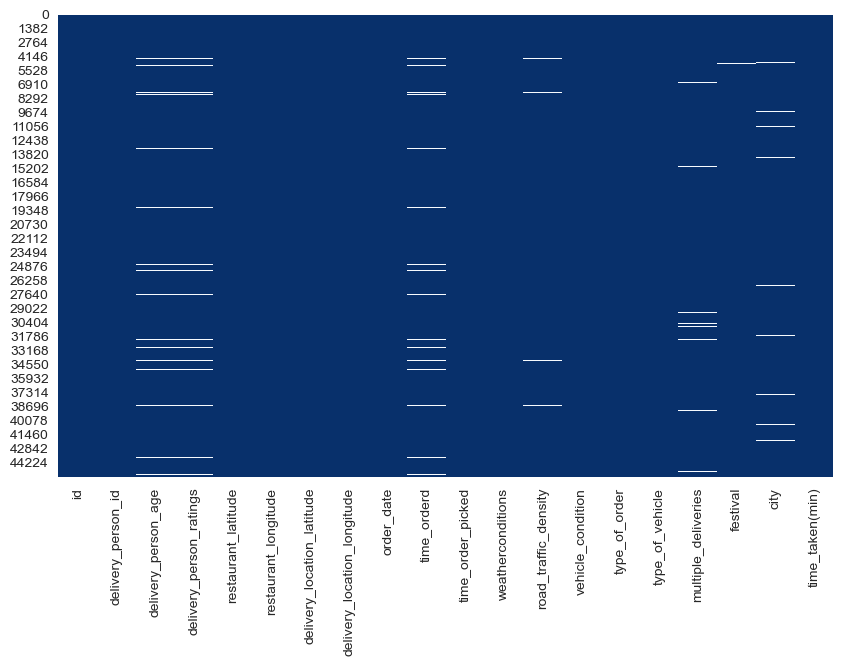

In [13]:
plt.figure(figsize = (10, 6))

sns.heatmap(data.isna(), cmap = 'Blues_r', cbar = False);

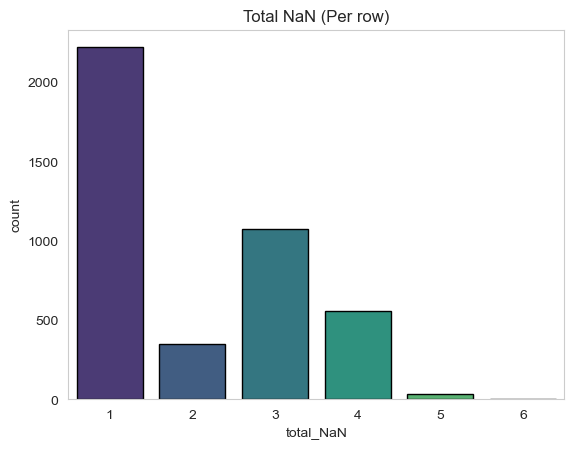

In [14]:
data['total_NaN'] = data.isna().sum(axis=1)

sns.countplot(data = data[data.total_NaN != 0], x = 'total_NaN', palette = 'viridis', edgecolor = 'k')

plt.title('Total NaN (Per row)')
plt.grid(False)

In diese graph wee see most of the data has only one missing value.

In [15]:
# Rows with more than 5 NaN values

data[data['total_NaN'] > 5].isna().sum().sort_values(ascending = False)[:12]

road_traffic_density       1
delivery_person_age        1
delivery_person_ratings    1
city                       1
multiple_deliveries        1
time_orderd                1
id                         0
time_taken(min)            0
festival                   0
type_of_vehicle            0
type_of_order              0
vehicle_condition          0
dtype: int64

Those rows with more than 5 missing values are not worth imputing since 6 or more (up to 10) missing values are out of 16 predicting features is way too much, 

so I am gonna remove those rows with more than 5 missing values and impute those with less than that.

In [17]:
# Number of Observations dropped

data.shape[0] - data[data['total_NaN'] < 5].shape[0]

34

In [18]:
data = data[data['total_NaN'] < 5]

After dropping the missing value lets look how many percent is the missing value in dataset

In [20]:
MissingValues = pd.DataFrame(data.isna().sum().sort_values(ascending = False)[:11])

MissingValues.rename(columns = {0 : 'Missing'}, inplace = True, errors = 'raise')

MissingValues['Missing %'] = round(MissingValues['Missing'] / data.shape[0] * 100, 2)

MissingValues

,Missing,Missing %
delivery_person_ratings,1874,4.11
delivery_person_age,1820,3.99
time_orderd,1697,3.72
city,1181,2.59
multiple_deliveries,980,2.15
road_traffic_density,569,1.25
festival,223,0.49
id,0,0.00
time_taken(min),0,0.00
type_of_vehicle,0,0.00


### Order_Date, Time_Orderd & Time_Order_picked
- Combine time variables

In [12]:
data['time_orderd'] = data['order_date'] + ' ' + data['time_orderd']
data['time_order_picked'] = data['order_date'] + ' ' + data['time_order_picked']

In [13]:
data['time_orderd'].value_counts()

time_orderd
20-03-2022 20:15:00    25
06-03-2022 18:35:00    24
02-03-2022 22:45:00    23
31-03-2022 22:50:00    22
10-03-2022 17:40:00    22
                       ..
13-03-2022 13:40:00     1
05-04-2022 16:20:00     1
13-02-2022 15:50:00     1
05-04-2022 16:45:00     1
17-03-2022 17:00:00     1
Name: count, Length: 5503, dtype: int64

### convert to the pd.to_datetime

In [14]:
data['time_orderd'] = pd.to_datetime(data['time_orderd'], format = '%d-%m-%Y %H:%M:%S')
data['time_order_picked'] = pd.to_datetime(data['time_order_picked'], format = '%d-%m-%Y %H:%M:%S')

In [15]:
data['time_orderd'] = pd.to_datetime(data['time_orderd'], format = '%d-%m-%Y %H:%M:%S')
data['time_order_picked'] = pd.to_datetime(data['time_order_picked'], format = '%d-%m-%Y %H:%M:%S')